In [144]:
import zipfile
from pathlib import Path
import shutil
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [145]:
root_dir = "../../tensorflow_datasets/dogs-vs-cats"
dirpath = Path(root_dir)
if dirpath.exists() and dirpath.is_dir():
    shutil.rmtree(dirpath)

In [146]:
with zipfile.ZipFile("../../tensorflow_datasets/dogs-vs-cats.zip","r") as zip_ref:
    print(root_dir)
    zip_ref.extractall(root_dir)
    zip_ref.close()

../../tensorflow_datasets/dogs-vs-cats


In [147]:
for (root,dirs,files) in os.walk(root_dir, topdown=True):
        for f in files:
            if f.split('.')[1] == 'zip':
                path = os.path.join(root_dir,f.split('.')[0]+'.zip')
                print(path)
                zf = zipfile.ZipFile(path, 'r')
                zf.extractall(root_dir)
                zf.close()
                # zip_ref.extract(path)

../../tensorflow_datasets/dogs-vs-cats/test1.zip
../../tensorflow_datasets/dogs-vs-cats/train.zip


In [148]:
for (root,dirs,files) in os.walk(root_dir.split('.')[0], topdown=True):
        for f in files:
            if f.split('.')[1] == 'zip':
                path = os.path.join(root_dir.spli('.')[0],f.split('.')[0],'.zip')
                os.remove(path)

In [149]:
os.rename('../../tensorflow_datasets/dogs-vs-cats/test1','../../tensorflow_datasets/dogs-vs-cats/test')
os.mkdir('../../tensorflow_datasets/dogs-vs-cats/train/cats')
os.mkdir('../../tensorflow_datasets/dogs-vs-cats/train/dogs')

In [150]:
from os import walk
_, _, filenames = next(walk('../../tensorflow_datasets/dogs-vs-cats/train'))
for name in filenames:
    if name.split('.')[0] == 'cat':
        src_path = os.path.join('../../tensorflow_datasets/dogs-vs-cats/train',name)
        dst_path = os.path.join('../../tensorflow_datasets/dogs-vs-cats/train/cats',name)
        shutil.copyfile(src_path,dst_path)
    else:
        src_path = os.path.join('../../tensorflow_datasets/dogs-vs-cats/train',name)
        dst_path = os.path.join('../../tensorflow_datasets/dogs-vs-cats/train/cats',name)
        shutil.copyfile(src_path,dst_path)

In [151]:
TRAINING_DIR = '../../tensorflow_datasets/dogs-vs-cats/train'
train_datagen = ImageDataGenerator(rescale=1 / 255)
train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    batch_size=64,
    class_mode='binary',
    target_size=(150, 150)
)


Found 25000 images belonging to 2 classes.


In [155]:
model = tf.keras.models.Sequential([
# YOUR CODE HERE
    tf.keras.layers.Conv2D(16,(3,3),strides=(1, 1), padding='valid',input_shape=(150,150,3)),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(32,(3,3),strides=(1, 1), padding='valid'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64,(3,3),strides=(1, 1), padding='valid'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128 , activation = tf.nn.relu ),
    tf.keras.layers.Dense(1,  activation = tf.nn.sigmoid)
])

model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

model.summary()

history = model.fit(train_generator,epochs=2,verbose=1)


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 18496)            

cat 


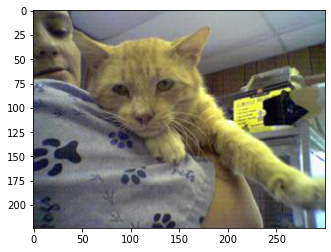

In [191]:
from PIL import Image
import numpy as np
from skimage import transform
from scipy import ndimage
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

def load(filename):
   np_image = Image.open(filename)
   np_image = np.array(np_image).astype('float32')/255
   np_image = transform.resize(np_image, (150, 150, 3))
   np_image = np.expand_dims(np_image, axis=0)
   return np_image

label = np.argmax(model.predict(image))
class_names = ['cat ', 'Not cat']
print(class_names[label])
img = mpimg.imread('../../tensorflow_datasets/dogs-vs-cats/test/9999.jpg')
imgplot = plt.imshow(img)
plt.show()
